In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/eli/anaconda3/envs/HTFA

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(lepping_db.all()), mask='/data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100)

01/21/2019 23:49:12 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-nonmusic_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/21/2019 23:49:15 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-music_run-4_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/21/2019 23:49:18 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-nonmusic_run-1_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/21/2019 23:49:21 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-music_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/e

In [6]:
htfa.load_state('data/lepping_2017_k100_n1000_01152019_151317')

In [7]:
def subject_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [8]:
def task_labeler(block):
    if block.task == 'negative_music':
        task = 'Negative music'
    elif block.task == 'positive_music':
        task = 'Positive music'
    elif block.task == 'negative_nonmusic':
        task = 'Negative sounds'
    elif block.task == 'positive_nonmusic':
        task = 'Positive sounds'
    else:
        task = block.task.capitalize()
    return task

In [9]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

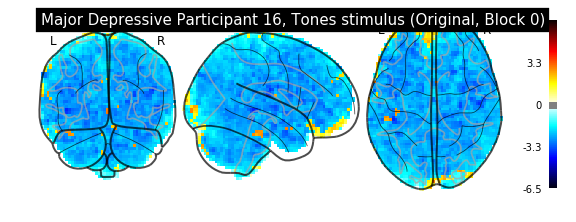

01/21/2019 23:59:25 Reconstruction Error (Frobenius Norm): 6.71524963e+02 out of 1.21773730e+03


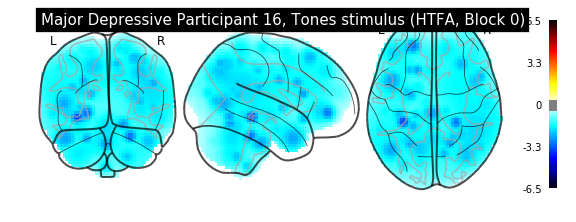

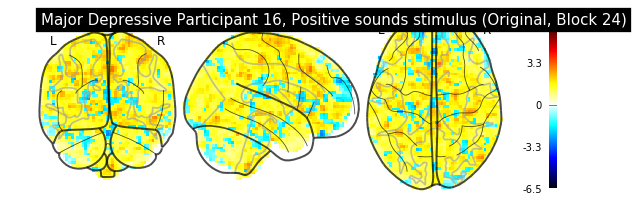

01/21/2019 23:59:30 Reconstruction Error (Frobenius Norm): 5.20388123e+02 out of 5.85476807e+02


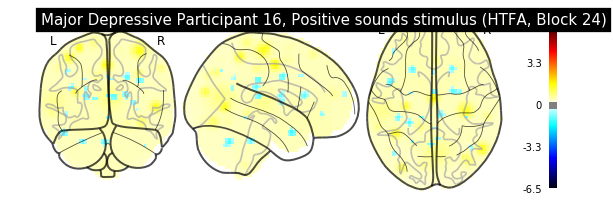

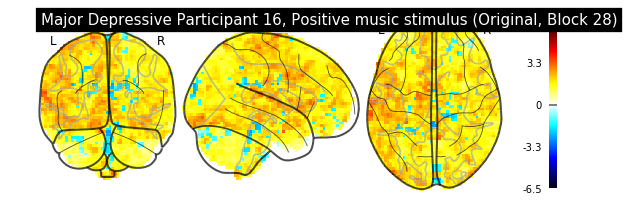

01/21/2019 23:59:35 Reconstruction Error (Frobenius Norm): 5.65733704e+02 out of 7.76344238e+02


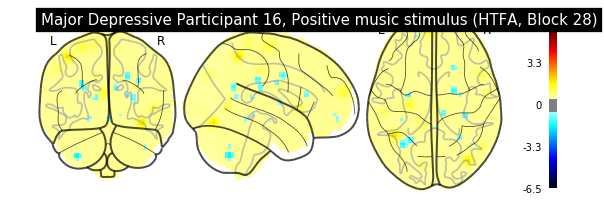

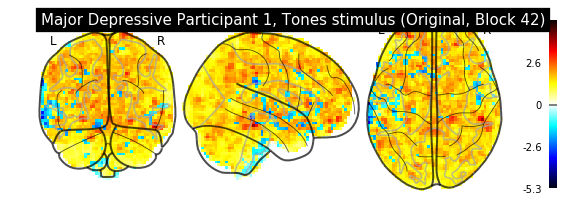

01/21/2019 23:59:40 Reconstruction Error (Frobenius Norm): 6.01579163e+02 out of 7.26101013e+02


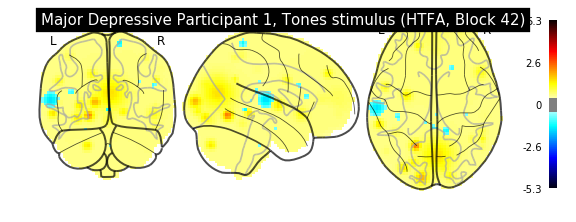

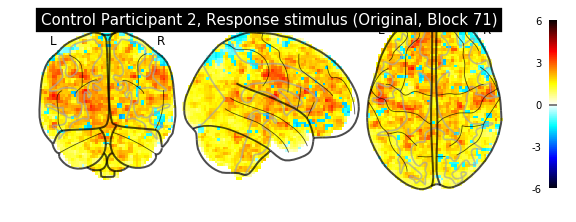

01/21/2019 23:59:44 Reconstruction Error (Frobenius Norm): 2.43847122e+02 out of 2.44230789e+02


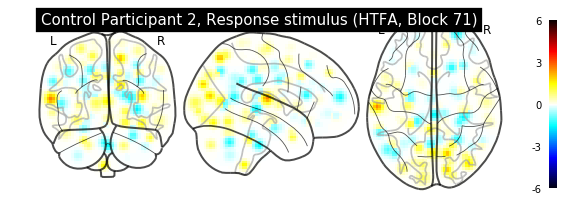

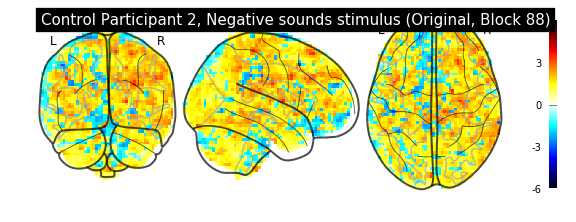

01/21/2019 23:59:49 Reconstruction Error (Frobenius Norm): 6.38303467e+02 out of 6.97879395e+02


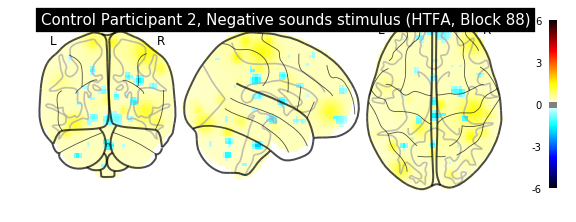

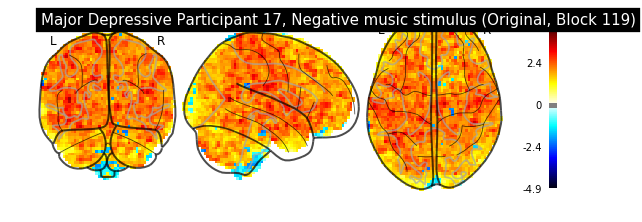

01/21/2019 23:59:54 Reconstruction Error (Frobenius Norm): 6.12223816e+02 out of 9.29792114e+02


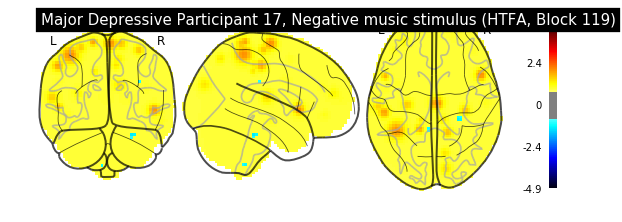

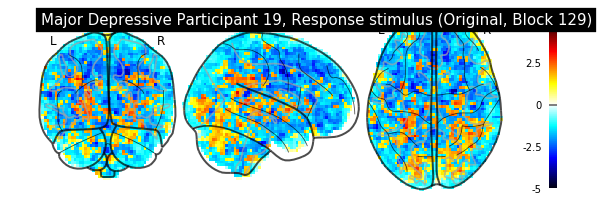

01/21/2019 23:59:58 Reconstruction Error (Frobenius Norm): 2.24960480e+02 out of 2.23265839e+02


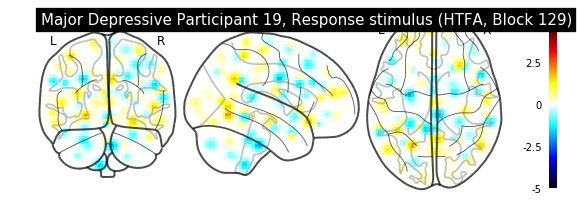

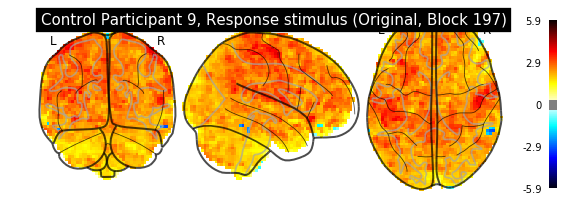

01/22/2019 00:00:02 Reconstruction Error (Frobenius Norm): 1.80931152e+02 out of 4.16964264e+02


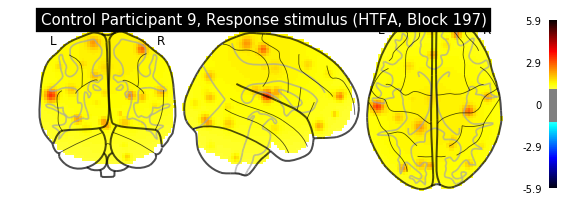

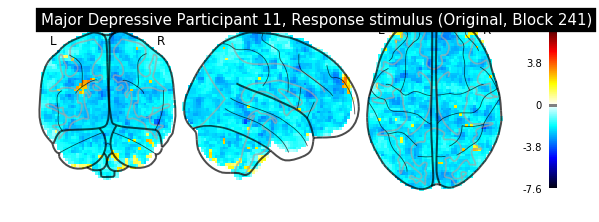

01/22/2019 00:00:06 Reconstruction Error (Frobenius Norm): 2.05053986e+02 out of 3.38348633e+02


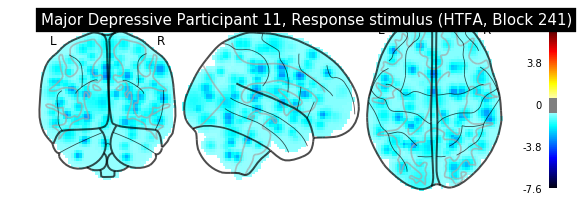

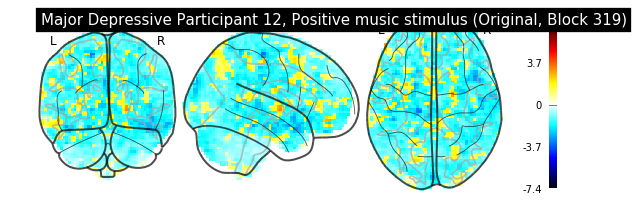

01/22/2019 00:00:11 Reconstruction Error (Frobenius Norm): 5.47581604e+02 out of 6.03930725e+02


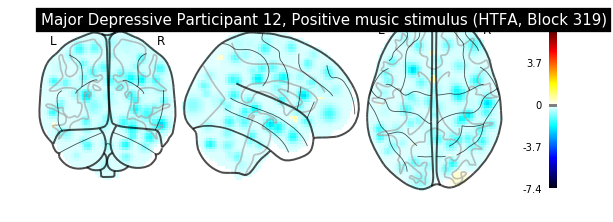

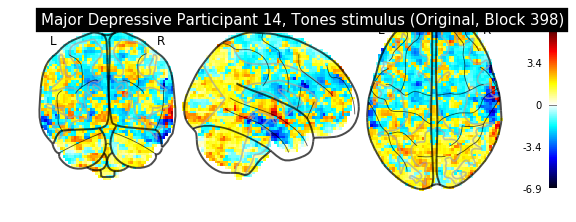

01/22/2019 00:00:16 Reconstruction Error (Frobenius Norm): 5.74868835e+02 out of 5.74846497e+02


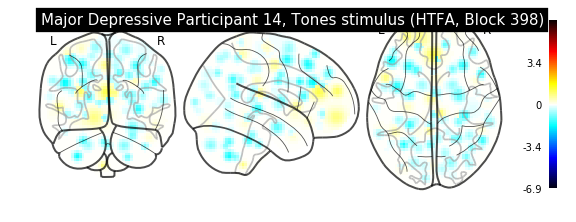

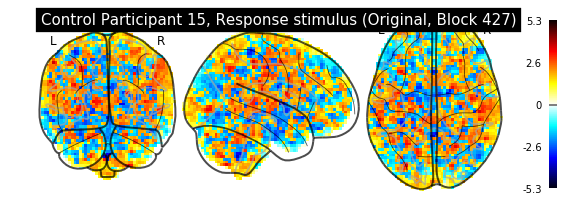

01/22/2019 00:00:20 Reconstruction Error (Frobenius Norm): 2.50914169e+02 out of 2.53298782e+02


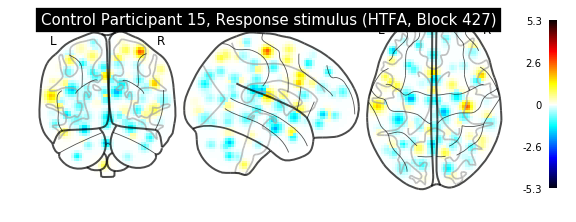

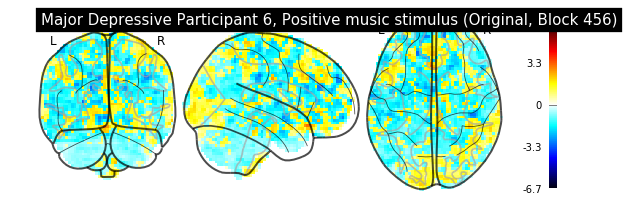

01/22/2019 00:00:26 Reconstruction Error (Frobenius Norm): 5.29794556e+02 out of 5.55532410e+02


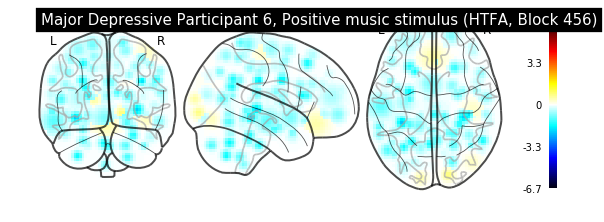

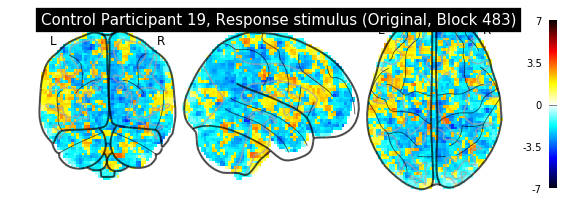

01/22/2019 00:00:30 Reconstruction Error (Frobenius Norm): 2.74790375e+02 out of 2.70797974e+02


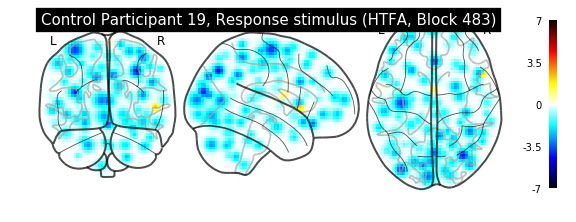

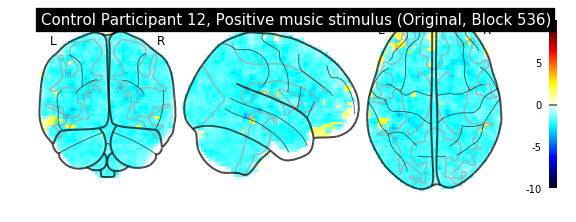

01/22/2019 00:00:35 Reconstruction Error (Frobenius Norm): 6.19658325e+02 out of 9.01763245e+02


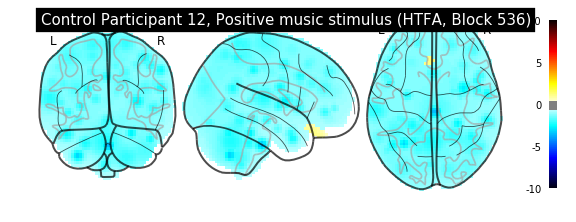

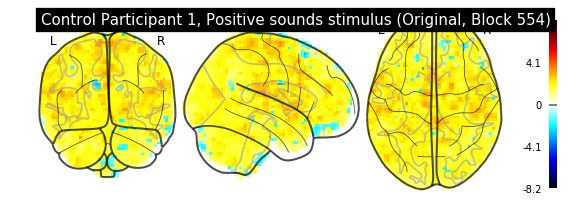

01/22/2019 00:00:40 Reconstruction Error (Frobenius Norm): 5.93787537e+02 out of 8.84992981e+02


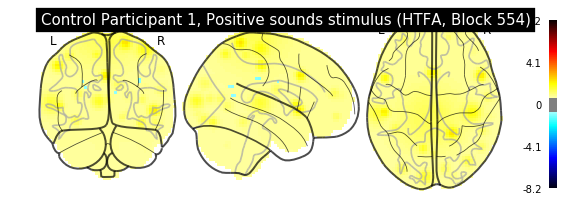

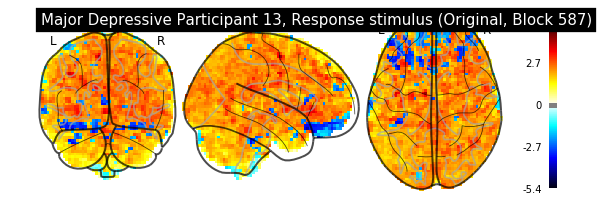

01/22/2019 00:00:44 Reconstruction Error (Frobenius Norm): 2.34479919e+02 out of 3.50562225e+02


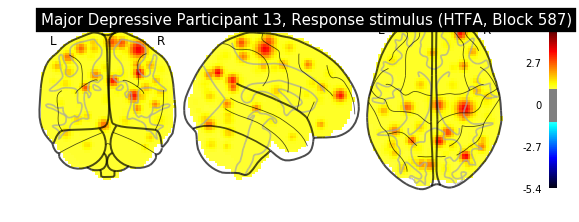

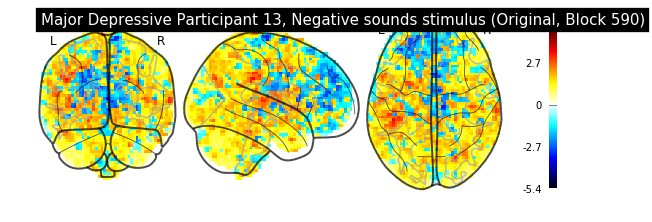

01/22/2019 00:00:48 Reconstruction Error (Frobenius Norm): 6.14295593e+02 out of 6.96712646e+02


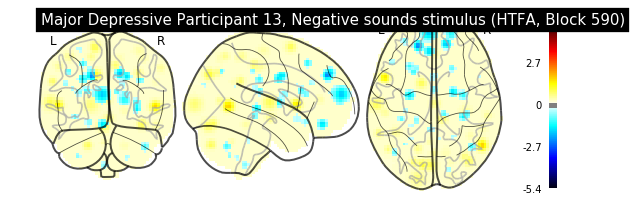

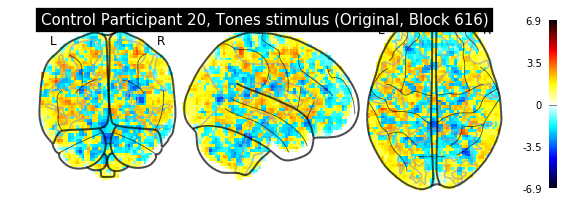

01/22/2019 00:00:53 Reconstruction Error (Frobenius Norm): 8.99821289e+02 out of 8.65296143e+02


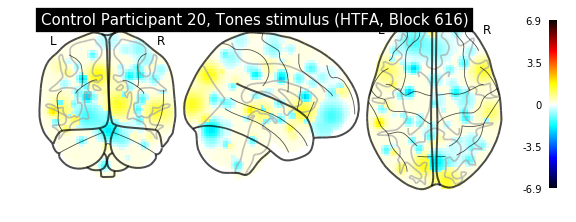

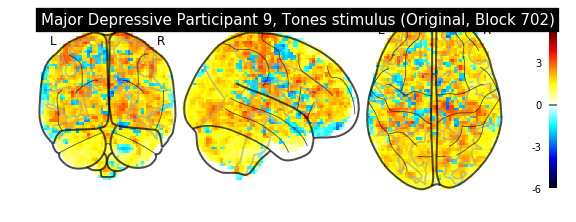

01/22/2019 00:00:58 Reconstruction Error (Frobenius Norm): 6.81055359e+02 out of 7.51073120e+02


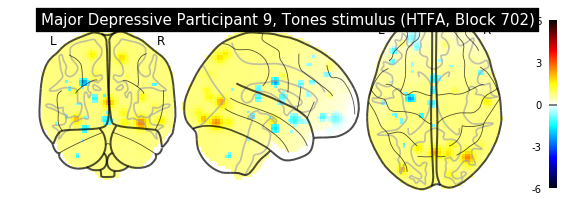

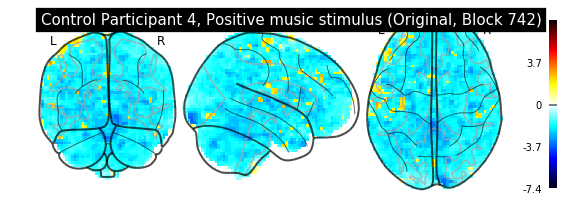

01/22/2019 00:01:04 Reconstruction Error (Frobenius Norm): 5.43663757e+02 out of 9.26607544e+02


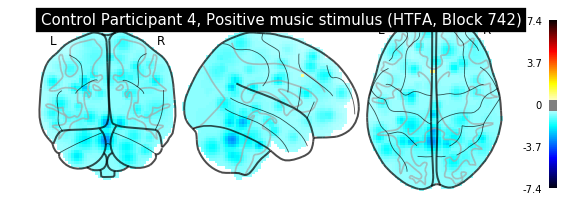

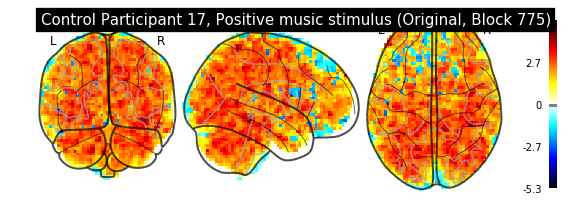

01/22/2019 00:01:09 Reconstruction Error (Frobenius Norm): 7.74822266e+02 out of 8.84880615e+02


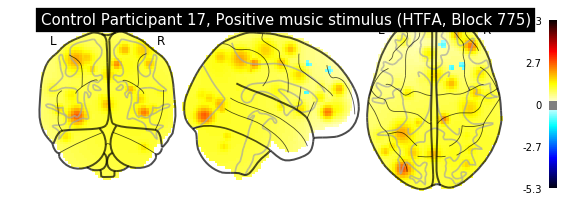

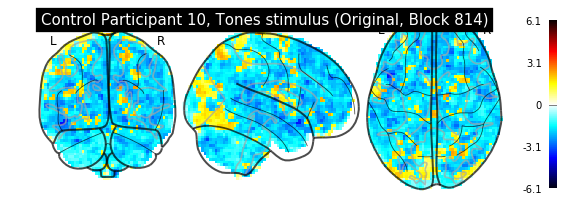

01/22/2019 00:01:14 Reconstruction Error (Frobenius Norm): 6.44080078e+02 out of 8.25507935e+02


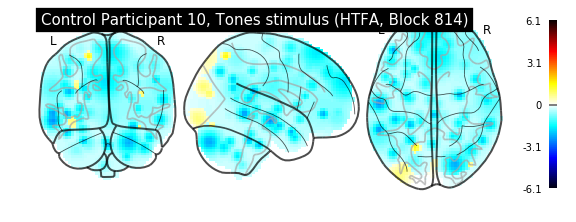

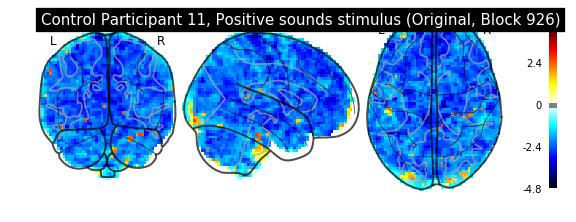

01/22/2019 00:01:20 Reconstruction Error (Frobenius Norm): 6.44545898e+02 out of 9.18257874e+02


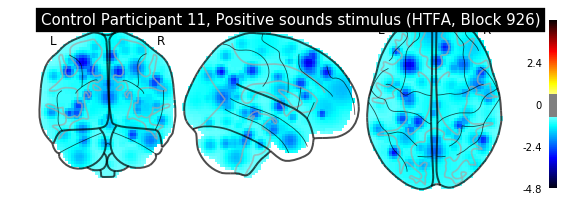

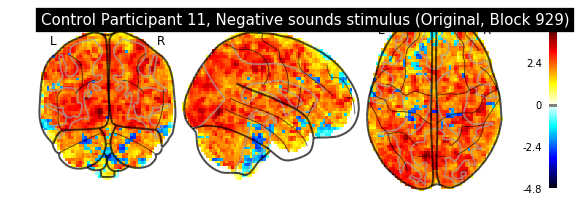

01/22/2019 00:01:25 Reconstruction Error (Frobenius Norm): 6.68100159e+02 out of 9.32315063e+02


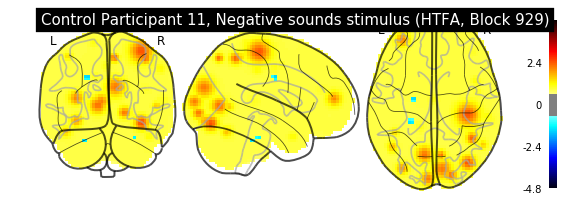

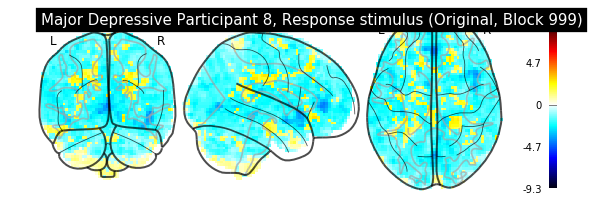

01/22/2019 00:01:29 Reconstruction Error (Frobenius Norm): 3.12791901e+02 out of 2.45309341e+02


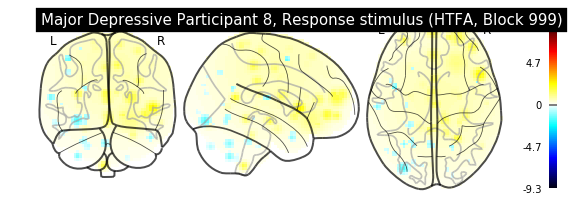

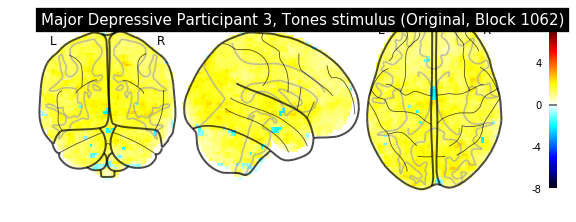

01/22/2019 00:01:35 Reconstruction Error (Frobenius Norm): 7.32951660e+02 out of 6.99515808e+02


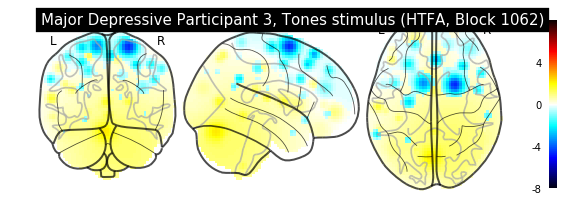

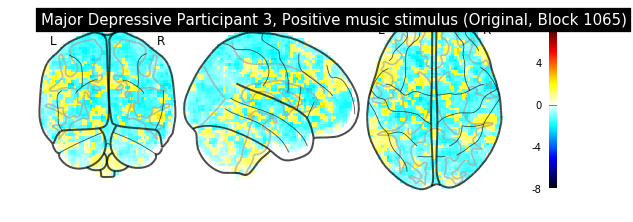

01/22/2019 00:01:40 Reconstruction Error (Frobenius Norm): 5.42295593e+02 out of 5.94617432e+02


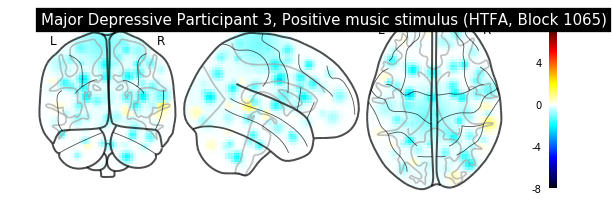

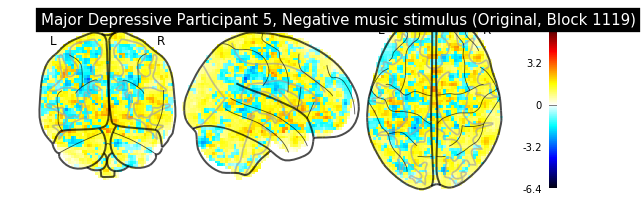

01/22/2019 00:01:46 Reconstruction Error (Frobenius Norm): 5.65324097e+02 out of 6.21463135e+02


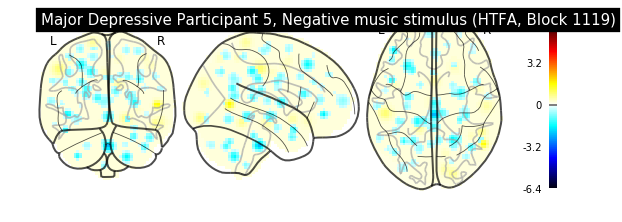

In [10]:
for b in sorted([0, 1062, 1065, 1119, 119, 129, 197, 241, 24, 28, 319, 398, 427, 42, 456, 483, 536, 554, 587, 590, 616, 702, 71, 742, 775, 814, 88, 926, 929, 999]):
    htfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    htfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

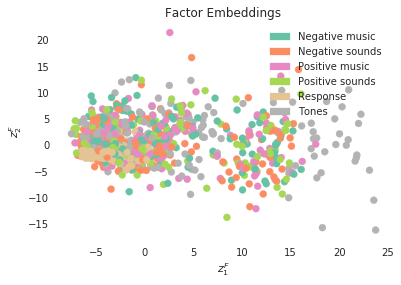

In [11]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=task_labeler, embedding='PCA')

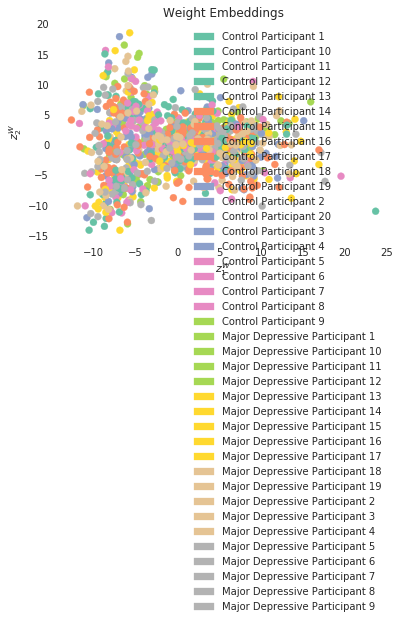

In [12]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=subject_labeler, embedding='PCA')

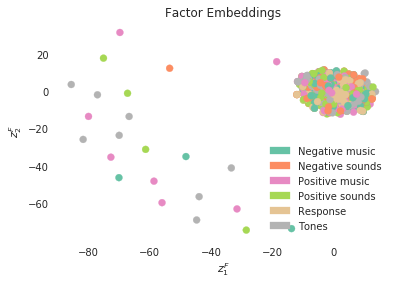

In [13]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=task_labeler, embedding='TSNE')

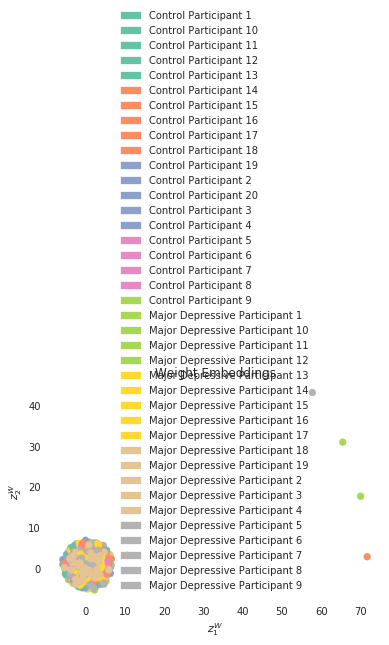

In [14]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=subject_labeler, embedding='TSNE')

In [15]:
htfa.average_reconstruction_error()

01/22/2019 00:09:21 Average reconstruction error (MSE): 7.94804476e-01
01/22/2019 00:09:21 Average data norm (Euclidean): 9.63051352e-01
01/22/2019 00:09:21 Percent average reconstruction error: 0.320559


(0.794804476092822, 0.9630513515838449, 0.003205588592450946)

In [16]:
def condition_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

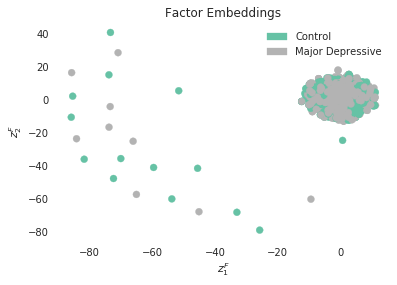

In [17]:
htfa.scatter_factor_embedding(labeler=condition_labeler, embedding='TSNE')